In [5]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()

In [6]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


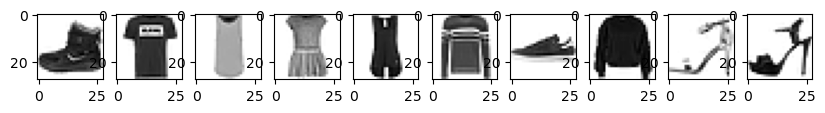

In [33]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize = (10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    #xs[i].axis('off')
plt.show()

In [37]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [38]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [41]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [43]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8305833333333335


In [45]:
import tensorflow as tf
from tensorflow import keras

In [48]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size = 0.2, random_state = 42)

In [49]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [51]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))
model = keras.Sequential(dense)

In [53]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [55]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [56]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6025 - accuracy: 0.7961
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4736 - accuracy: 0.8381
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.8473
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4374 - accuracy: 0.8525
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4288 - accuracy: 0.8544


In [57]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4445 - accuracy: 0.8482


[0.4445055425167084, 0.8482499718666077]